# Timon Spichtinger Machine Learning 2 Modularbeit

In [5]:
from torchvision.datasets import EMNIST
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
import torch
import importlib
from Datensatz import get_emnist_test_train, show_random_samples
import torch.nn as nn

Train und Testdaten werden aus Emnist-Datensatz geladen. Falls es zuwenige gibt werden die restlichen Augmentiert

In [6]:
X_train, y_train, X_test, y_test,class_list = get_emnist_test_train()

Ziel-ASCII: [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
Anzahl Zielklassen: 36
⚠️ Klasse B: nur 3878 echte Bilder – augmentiere 2122 zusätzlich.
⚠️ Klasse D: nur 4562 echte Bilder – augmentiere 1438 zusätzlich.
⚠️ Klasse E: nur 4934 echte Bilder – augmentiere 1066 zusätzlich.
⚠️ Klasse G: nur 2517 echte Bilder – augmentiere 3483 zusätzlich.
⚠️ Klasse H: nur 3152 echte Bilder – augmentiere 2848 zusätzlich.
⚠️ Klasse J: nur 3762 echte Bilder – augmentiere 2238 zusätzlich.
⚠️ Klasse K: nur 2468 echte Bilder – augmentiere 3532 zusätzlich.
⚠️ Klasse L: nur 5076 echte Bilder – augmentiere 924 zusätzlich.
⚠️ Klasse b: nur 5159 echte Bilder – augmentiere 841 zusätzlich.
⚠️ Klasse c: nur 2854 echte Bilder – augmentiere 3146 zusätzlich.
⚠️ Klasse f: nur 2561 echte Bilder – augmentiere 3439 zusätzlich.
⚠️ Klasse g: nur 3687 echte Bilder – augmentiere 2313 zusätzlich.
⚠️ Klasse i: nur 272

In [7]:
class_list

[48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109]

Stichprobe, ob der Datensatz passt

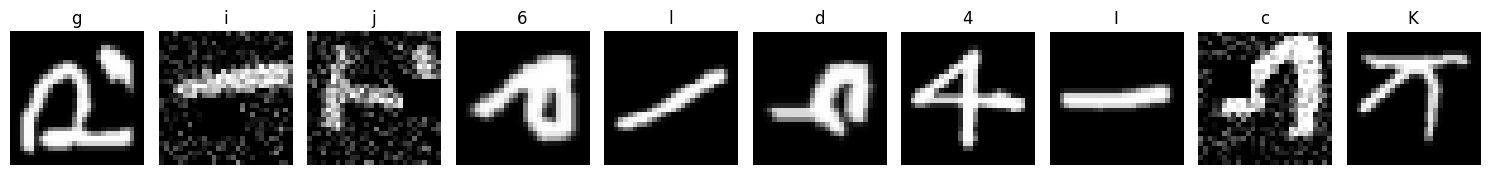

In [9]:
show_random_samples(X_test, y_test, class_list, n=10)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import optuna
from Klassifikator import get_objective, ResNet18, EarlyStopping


/home/timon/ML2Modularbeit/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:

# Gerät
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)



In [12]:
# -----------------------------
# Optuna-Studie starten
# -----------------------------
study = optuna.create_study(direction="maximize")
study.optimize(get_objective(
          train_dataset=train_dataset,
          test_dataset=test_dataset,
          device=device,
          model=ResNet18(num_classes=len(class_list)).to(device),
          early_stopping=EarlyStopping(patience=4)), n_trials=20)

# Beste Parameter anzeigen
print("🎯 Beste Hyperparameter:")
for k, v in study.best_params.items():
    print(f"{k}: {v}")



[I 2025-06-22 15:26:36,444] A new study created in memory with name: no-name-1b050c12-391c-4cd8-9823-72a6513e207c


📉 Epoch 1: Val Loss = 0.4947
📉 Epoch 2: Val Loss = 0.3946
📉 Epoch 3: Val Loss = 0.3696
📉 Epoch 4: Val Loss = 0.3640
📉 Epoch 5: Val Loss = 0.3630
📉 Epoch 6: Val Loss = 0.3552
📉 Epoch 7: Val Loss = 0.3666
📉 Epoch 8: Val Loss = 0.3778
📉 Epoch 9: Val Loss = 0.3697
⛔ Early Stopping in Epoch 10


[I 2025-06-22 15:29:50,061] Trial 0 finished with value: 0.8543888888888889 and parameters: {'batch_size': 144, 'lr': 0.020764818644962976, 'momentum': 0.6901517686431473, 'step_size': 5, 'gamma': 0.8446610713361149}. Best is trial 0 with value: 0.8543888888888889.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:30:29,152] Trial 1 finished with value: 0.8675 and parameters: {'batch_size': 64, 'lr': 0.0002626476455093473, 'momentum': 0.7742388161851498, 'step_size': 5, 'gamma': 0.6966457077817843}. Best is trial 1 with value: 0.8675.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:30:49,676] Trial 2 finished with value: 0.8667777777777778 and parameters: {'batch_size': 144, 'lr': 0.0005299509572357056, 'momentum': 0.6529835506521925, 'step_size': 4, 'gamma': 0.6401312796271024}. Best is trial 1 with value: 0.8675.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:31:28,552] Trial 3 finished with value: 0.86625 and parameters: {'batch_size': 64, 'lr': 0.0002688841248801269, 'momentum': 0.8417745238951722, 'step_size': 3, 'gamma': 0.6445902290363521}. Best is trial 1 with value: 0.8675.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:32:07,467] Trial 4 finished with value: 0.8660833333333333 and parameters: {'batch_size': 64, 'lr': 0.00011387914347155919, 'momentum': 0.7024452859301568, 'step_size': 4, 'gamma': 0.5947190142501897}. Best is trial 1 with value: 0.8675.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:32:23,658] Trial 5 finished with value: 0.8665555555555555 and parameters: {'batch_size': 256, 'lr': 0.000125472361981672, 'momentum': 0.6964429260164438, 'step_size': 4, 'gamma': 0.5696984435343417}. Best is trial 1 with value: 0.8675.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:32:44,210] Trial 6 finished with value: 0.8511388888888889 and parameters: {'batch_size': 144, 'lr': 0.049900454432328024, 'momentum': 0.765390092149725, 'step_size': 5, 'gamma': 0.7027098266730037}. Best is trial 1 with value: 0.8675.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:33:00,399] Trial 7 finished with value: 0.869 and parameters: {'batch_size': 256, 'lr': 0.0005543410708730624, 'momentum': 0.9373151936144546, 'step_size': 4, 'gamma': 0.6115812631807419}. Best is trial 7 with value: 0.869.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:33:20,900] Trial 8 finished with value: 0.8690277777777777 and parameters: {'batch_size': 144, 'lr': 0.00018784872833566514, 'momentum': 0.7216490889652839, 'step_size': 4, 'gamma': 0.843042780832338}. Best is trial 8 with value: 0.8690277777777777.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:33:36,985] Trial 9 finished with value: 0.8677222222222222 and parameters: {'batch_size': 256, 'lr': 0.02323977172081824, 'momentum': 0.6295707832606687, 'step_size': 4, 'gamma': 0.7800745027767458}. Best is trial 8 with value: 0.8690277777777777.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:33:58,265] Trial 10 finished with value: 0.8698611111111111 and parameters: {'batch_size': 128, 'lr': 0.003021825861562867, 'momentum': 0.8428798752491594, 'step_size': 2, 'gamma': 0.9331893268725289}. Best is trial 10 with value: 0.8698611111111111.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:34:19,752] Trial 11 finished with value: 0.8669722222222223 and parameters: {'batch_size': 128, 'lr': 0.003093141654967733, 'momentum': 0.8650018189862356, 'step_size': 2, 'gamma': 0.9445900459081065}. Best is trial 10 with value: 0.8698611111111111.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:34:41,054] Trial 12 finished with value: 0.86425 and parameters: {'batch_size': 128, 'lr': 0.0029921156750480774, 'momentum': 0.864400117296005, 'step_size': 2, 'gamma': 0.9396676738130931}. Best is trial 10 with value: 0.8698611111111111.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:35:02,365] Trial 13 finished with value: 0.8667777777777778 and parameters: {'batch_size': 128, 'lr': 0.001578025287044887, 'momentum': 0.826344389108888, 'step_size': 3, 'gamma': 0.8503390392400593}. Best is trial 10 with value: 0.8698611111111111.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:35:22,957] Trial 14 finished with value: 0.8495833333333334 and parameters: {'batch_size': 144, 'lr': 0.009871387509443321, 'momentum': 0.9399936856950271, 'step_size': 3, 'gamma': 0.8684243458346163}. Best is trial 10 with value: 0.8698611111111111.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:35:44,215] Trial 15 finished with value: 0.8695277777777778 and parameters: {'batch_size': 128, 'lr': 0.001190563370932246, 'momentum': 0.7392689792699053, 'step_size': 2, 'gamma': 0.7663275804093992}. Best is trial 10 with value: 0.8698611111111111.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:36:05,471] Trial 16 finished with value: 0.8697777777777778 and parameters: {'batch_size': 128, 'lr': 0.0012623878832816835, 'momentum': 0.7477818754802374, 'step_size': 2, 'gamma': 0.5010048212323668}. Best is trial 10 with value: 0.8698611111111111.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:36:26,684] Trial 17 finished with value: 0.8641111111111112 and parameters: {'batch_size': 128, 'lr': 0.00728737145333502, 'momentum': 0.808100973377723, 'step_size': 2, 'gamma': 0.5019012799488144}. Best is trial 10 with value: 0.8698611111111111.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:36:48,163] Trial 18 finished with value: 0.8668888888888889 and parameters: {'batch_size': 128, 'lr': 0.0011311670383583943, 'momentum': 0.8944176707165965, 'step_size': 3, 'gamma': 0.5215908483754571}. Best is trial 10 with value: 0.8698611111111111.


⛔ Early Stopping in Epoch 1


[I 2025-06-22 15:37:09,359] Trial 19 finished with value: 0.868 and parameters: {'batch_size': 128, 'lr': 0.006377653704720029, 'momentum': 0.7986814031392421, 'step_size': 2, 'gamma': 0.7650006004613287}. Best is trial 10 with value: 0.8698611111111111.


🎯 Beste Hyperparameter:
batch_size: 128
lr: 0.003021825861562867
momentum: 0.8428798752491594
step_size: 2
gamma: 0.9331893268725289


In [13]:
# -----------------------------
# Finales Training mit besten Parametern 
# -----------------------------
best_params = study.best_params
train_loader = DataLoader(train_dataset, batch_size=best_params["batch_size"], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_params["batch_size"], shuffle=False)

model = ResNet18(num_classes=len(class_list)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=best_params["lr"], momentum=best_params["momentum"])
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=best_params["step_size"], gamma=best_params["gamma"])





In [ ]:
for epoch in range(30):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if (i + 1) % 200 == 0:
            print(f"🔁 Epoch {epoch+1}, Step {i+1}/{len(train_loader)}: Batch Loss = {loss.item():.4f}")

    scheduler.step()

    # Validierung
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    val_loss /= len(test_loader)
    train_acc = 100.0 * correct_train / total_train
    val_acc = 100.0 * correct_val / total_val

    print(f"📊 Epoch {epoch+1}: Train Acc = {train_acc:.2f}%, Val Acc = {val_acc:.2f}%, Val Loss = {val_loss:.4f}, LR = {scheduler.get_last_lr()}")
    early_stopping = EarlyStopping()
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print(f"🛑 Early stopping ausgelöst bei Epoch {epoch+1} (Val Loss: {val_loss:.4f})")
        break


In [ ]:
# Modell speichern
torch.save(model.state_dict(), './resnet18_best_hyperparams.pth')
print("✅ Modell gespeichert.")

In [14]:
import torch
from collections import defaultdict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

def evaluate_model(model, test_loader, device, class_list):
    model.eval()  # Setze das Modell in den Evaluierungsmodus
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Keine Gradientenberechnung, da wir nur evaluieren
        n_correct = 0
        n_samples = 0
        n_class_correct = defaultdict(int)
        n_class_samples = defaultdict(int)

        # Iteriere über den Testdatensatz
        for images, labels in test_loader:
            images = images.to(device)  # Bilder auf das gleiche Gerät verschieben (GPU oder CPU)
            labels = labels.to(device)  # Labels auf das gleiche Gerät verschieben (GPU oder CPU)
            
            # Vorwärtsdurchlauf
            outputs = model(images)
            
            # Vorhersagen
            _, predicted = torch.max(outputs, 1)

            # Update der Gesamtmetriken
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

            # Update der Metriken pro Klasse
            for i in range(labels.size(0)):
                label = labels[i].item()
                pred = predicted[i].item()
                if label == pred:
                    n_class_correct[label] += 1
                n_class_samples[label] += 1

            # Speichere alle Labels und Vorhersagen für die Berechnung der weiteren Metriken
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        # Berechnung der Gesamtgenauigkeit
        acc = 100.0 * n_correct / n_samples
        print(f'Gesamtgenauigkeit des Netzwerks: {acc:.2f} %')

        # Berechnung der Klasse-genauen Genauigkeit
        for label in sorted(n_class_samples.keys()):
            ascii_char = class_list[label]
            class_acc = 100.0 * n_class_correct[label] / n_class_samples[label]
            print(f'Genauigkeit für Klasse {ascii_char}: {class_acc:.2f} %')

        # Berechnung der Precision, Recall und F1-Score für jede Klasse
        precision = precision_score(all_labels, all_predictions, average=None, labels=np.unique(all_labels))
        recall = recall_score(all_labels, all_predictions, average=None, labels=np.unique(all_labels))
        f1 = f1_score(all_labels, all_predictions, average=None, labels=np.unique(all_labels))
        
        # Berechne den durchschnittlichen F1-Score
        avg_f1 = f1_score(all_labels, all_predictions, average='weighted')
        
        print("\nPrecision, Recall, F1-Score pro Klasse:")
        for i, ascii_char in enumerate(class_list):
            print(f"Klasse {ascii_char}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1-Score={f1[i]:.2f}")
        
        print(f"\nDurchschnittlicher F1-Score (gewichtet): {avg_f1:.2f}")

        # Berechnung der Konfusionsmatrix
        cm = confusion_matrix(all_labels, all_predictions)
        print(f"\nKonfusionsmatrix:\n{cm}")

        # Berechnung der ROC-AUC (für Multiklassen kann man dies auch für jedes Label einzeln berechnen)
        try:
            roc_auc = roc_auc_score(all_labels, model_output_to_probs(model, test_loader, device), multi_class='ovr', average='weighted')
            print(f"\nDurchschnittliche ROC-AUC: {roc_auc:.2f}")
        except ValueError:
            print("\nROC-AUC konnte nicht berechnet werden (möglicherweise nicht geeignet für das Problem).")

        return acc

# Hilfsfunktion zur Berechnung der ROC-AUC für das Multiklassenproblem
def model_output_to_probs(model, test_loader, device):
    model.eval()
    all_probs = []
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())
    return np.array(all_probs)

# Beispielaufruf
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Wähle GPU, wenn verfügbar

# Modell auf das Gerät (GPU/CPU) verschieben
model = model.to(device)

# Jetzt den Evaluierungscode aufrufen
evaluate_model(model, test_loader, device, class_list)


Gesamtgenauigkeit des Netzwerks: 3.17 %
Genauigkeit für Klasse 48: 0.00 %
Genauigkeit für Klasse 49: 0.00 %
Genauigkeit für Klasse 50: 0.00 %
Genauigkeit für Klasse 51: 0.00 %
Genauigkeit für Klasse 52: 0.00 %
Genauigkeit für Klasse 53: 0.00 %
Genauigkeit für Klasse 54: 0.00 %
Genauigkeit für Klasse 55: 0.00 %
Genauigkeit für Klasse 56: 0.00 %
Genauigkeit für Klasse 57: 0.00 %
Genauigkeit für Klasse 65: 0.00 %
Genauigkeit für Klasse 66: 11.50 %
Genauigkeit für Klasse 67: 0.00 %
Genauigkeit für Klasse 68: 0.00 %
Genauigkeit für Klasse 69: 0.00 %
Genauigkeit für Klasse 70: 0.00 %
Genauigkeit für Klasse 71: 0.00 %
Genauigkeit für Klasse 72: 2.70 %
Genauigkeit für Klasse 73: 0.00 %
Genauigkeit für Klasse 74: 3.00 %
Genauigkeit für Klasse 75: 0.00 %
Genauigkeit für Klasse 76: 0.00 %
Genauigkeit für Klasse 77: 0.00 %
Genauigkeit für Klasse 97: 0.00 %
Genauigkeit für Klasse 98: 0.00 %
Genauigkeit für Klasse 99: 0.00 %
Genauigkeit für Klasse 100: 0.00 %
Genauigkeit für Klasse 101: 97.00 %
Gena

/home/timon/ML2Modularbeit/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Durchschnittliche ROC-AUC: 0.53


3.172222222222222

# 1.3

new

list('0123456789ABCDEFGHIJKLMabcdefghijklm')

In [18]:
def create_type_labeled_dataloaders(X_train, y_train, X_test, y_test, class_list, batch_size):
    def get_type_labels(y_tensor):
        type_labels = []
        for label in y_tensor:
            char = str(class_list[int(label)])  # Ensure it's a string
            
            if char.isdigit():
                type_labels.append(0)  # Ziffer
            elif char.isupper():
                type_labels.append(1)  # Großbuchstabe
            else:
                type_labels.append(2)  # Kleinbuchstabe
        return torch.tensor(type_labels, dtype=torch.long)

    y_train_type = get_type_labels(y_train)
    y_test_type = get_type_labels(y_test)

    train_dataset = TensorDataset(X_train, y_train, y_train_type)
    test_dataset = TensorDataset(X_test, y_test, y_test_type)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader


In [19]:
train_loader, test_loader = create_type_labeled_dataloaders(
    X_train, y_train, X_test, y_test,
    class_list=class_list,
    batch_size=best_params["batch_size"]
)


In [28]:
def get_type_label_tensor(label_tensor):
    class_list = list('0123456789ABCDEFGHIJKLMabcdefghijklm')
    label_to_class = {i: c for i, c in enumerate(class_list)}
    
    type_labels = []
    for label in label_tensor:
        char = label_to_class[int(label)]
        if char.isdigit():
            type_labels.append(0)
        elif char.isupper():
            type_labels.append(1)
        else:
            type_labels.append(2)
    return torch.tensor(type_labels, dtype=torch.long)

In [29]:
y_train_type = get_type_label_tensor(y_train)
y_test_type = get_type_label_tensor(y_test)


In [30]:
train_dataset = TensorDataset(X_train, y_train, y_train_type)
test_dataset = TensorDataset(X_test, y_test, y_test_type)


In [37]:
# Beispielhafte Klasse-zu-Typ-Zuordnung: 0 = Groß, 1 = Klein, 2 = Ziffer
def get_type_label_tensor(y):
    type_labels = []
    for label in y:
        char = class_list[label]
        if char.isdigit():
            type_labels.append(2)
        elif char.isupper():
            type_labels.append(0)
        else:
            type_labels.append(1)
    return torch.tensor(type_labels)

In [31]:
class TypeClassifier(nn.Module):
    def __init__(self):
        super(TypeClassifier, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        return F.softmax(self.fc(x), dim=1)



In [32]:
class ModularClassifier(nn.Module):
    def __init__(self, tm1, tm2, class_type_map):
        super(ModularClassifier, self).__init__()
        self.tm1 = tm1
        self.tm2 = tm2
        self.class_type_map = torch.tensor(class_type_map, dtype=torch.long)  # Länge 36

    def forward(self, x):
        out_cls = self.tm1(x)  # shape (B, 36)
        out_type = self.tm2(x)  # shape (B, 3)

        type_probs = out_type[:, self.class_type_map.to(x.device)]  # shape (B, 36)
        final_out = out_cls * type_probs  # Elementweise Multiplikation

        return final_out, out_cls, out_type


In [36]:
# class_list = ['0', '1', ..., 'a', 'b', ...]
class_type_map = []
for c in class_list:
    if c.isdigit():
        class_type_map.append(2)
    elif c.isupper():
        class_type_map.append(0)
    else:
        class_type_map.append(1)



AttributeError: 'int' object has no attribute 'isdigit'

In [33]:
tm1 = ResNet18(num_classes=len(class_list))

modular_model = ModularClassifier(
    tm1,
    tm2=TypeClassifier(),
    class_type_map=class_type_map
).to(device)

criterion_cls = nn.CrossEntropyLoss()
criterion_type = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modular_model.parameters(), lr=1e-3)


In [34]:
for epoch in range(30):
    modular_model.train()
    total_loss = 0.0  # ✅ richtig initialisieren

    for images, labels_cls, labels_type in train_loader:
        images = images.to(device)
        labels_cls = labels_cls.to(device)
        labels_type = labels_type.to(device)

        final_out, out_cls, out_type = modular_model(images)

        loss_cls = criterion_cls(out_cls, labels_cls)
        loss_type = criterion_type(out_type, labels_type)
        loss = loss_cls + 0.5 * loss_type

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # ✅ jetzt ist total_loss eine float

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")




RuntimeError: The size of tensor a (36) must match the size of tensor b (0) at non-singleton dimension 1

[]

'4'